In [1]:
import clip
import torch
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

In [2]:
device = "cpu"

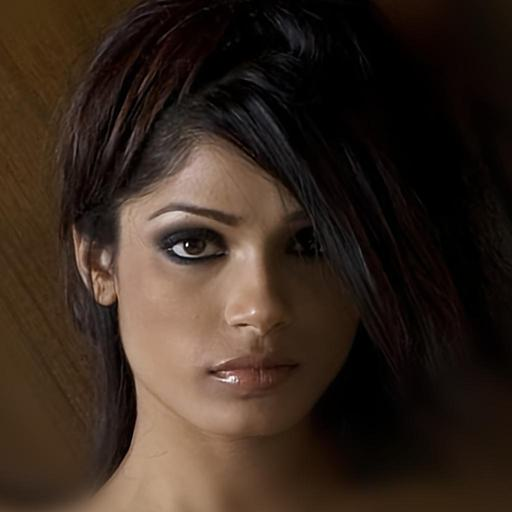

In [3]:
image_pil = Image.open("../data/mmcelebahq/face/27000.jpg")
image_pil

In [4]:
# "She is wearing lipstick. She is attractive and has straight hair."
# "She is young and has straight hair."
# "She wears lipstick. She has straight hair. She is attractive."
# "The woman has straight hair and wears heavy makeup. She is young."
# "This woman has straight hair. She is attractive. She wears heavy makeup."
# "This person has straight hair. She is wearing lipstick."
# "She has straight hair. She is young and wears heavy makeup."
# "She has straight hair and is wearing heavy makeup. She is young."
# "She wears heavy makeup. She is young and has straight hair."
# "This person has straight hair and is wearing heavy makeup. She is attractive."
text = ["She has straight hair. She is old and wears heavy makeup."]

## CLIP

In [5]:
model,process = clip.load("ViT-B/16",device=device,download_root="../checkpoints/clip")

In [11]:
image = process(image_pil).unsqueeze(0).to()
with torch.no_grad():
    image_features = model.encode_image(image)
    text_features = model.encode_text(clip.tokenize(text).to(device))
print(text_features.shape,image_features.shape,clip.tokenize(text).shape)

torch.Size([1, 512]) torch.Size([1, 512]) torch.Size([1, 77])


In [7]:
from torch.nn.functional import cosine_similarity
similarity = cosine_similarity(image_features, text_features, dim=1)

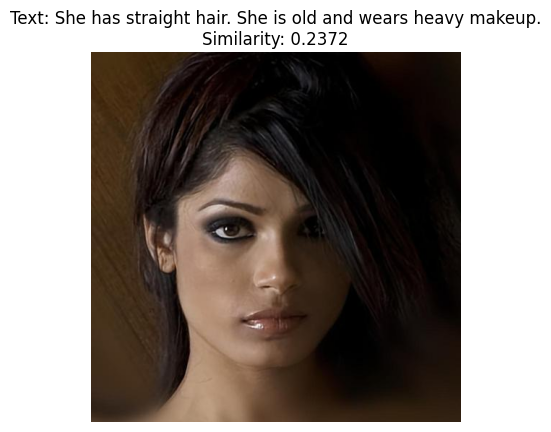

In [8]:
plt.imshow(image_pil)
plt.title(f'Text: {text[0]}\nSimilarity: {similarity.item():.4f}')
plt.axis('off')
plt.show()

## FARL

In [9]:
model,process = clip.load("ViT-B/16",device=device,download_root="../checkpoints/clip")
model.load_state_dict(torch.load("../checkpoints/farl/FaRL-Base-Patch16-LAIONFace20M-ep16.pth")['state_dict'],strict=False)

/tmp/ipykernel_3915146/3113256155.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("../checkpoints/farl/FaRL-Base-Patch16-LAIONFace20M-ep

_IncompatibleKeys(missing_keys=[], unexpected_keys=['visual.mask_token', 'visual.lm_transformer.resblocks.0.attn.in_proj_weight', 'visual.lm_transformer.resblocks.0.attn.in_proj_bias', 'visual.lm_transformer.resblocks.0.attn.out_proj.weight', 'visual.lm_transformer.resblocks.0.attn.out_proj.bias', 'visual.lm_transformer.resblocks.0.ln_1.weight', 'visual.lm_transformer.resblocks.0.ln_1.bias', 'visual.lm_transformer.resblocks.0.mlp.c_fc.weight', 'visual.lm_transformer.resblocks.0.mlp.c_fc.bias', 'visual.lm_transformer.resblocks.0.mlp.c_proj.weight', 'visual.lm_transformer.resblocks.0.mlp.c_proj.bias', 'visual.lm_transformer.resblocks.0.ln_2.weight', 'visual.lm_transformer.resblocks.0.ln_2.bias', 'visual.ln_lm.weight', 'visual.ln_lm.bias', 'visual.lm_head.weight', 'visual.lm_head.bias'])

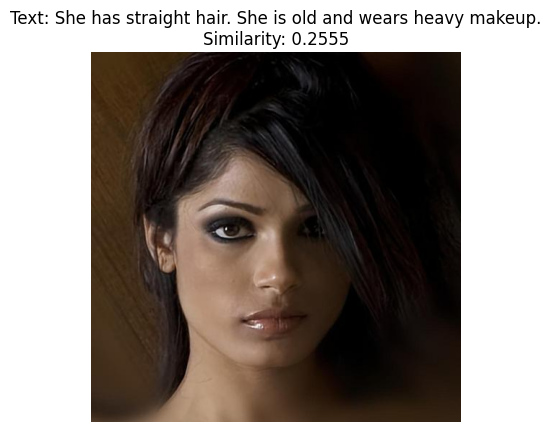

In [10]:
image = process(image_pil).unsqueeze(0).to()
with torch.no_grad():
    image_features = model.encode_image(image)
    text_features = model.encode_text(clip.tokenize(text).to(device))
similarity = cosine_similarity(image_features, text_features, dim=1)
plt.imshow(image_pil)
plt.title(f'Text: {text[0]}\nSimilarity: {similarity.item():.4f}')
plt.axis('off')
plt.show()